In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib as mpl

In [17]:
class IsingMetropolis():
    
    def lista_aleatorios(self,L):
        lista = [0]*(L**2)
        for i in range(L**2):
            lista[i] = random.randint(0,L**2-1)
        return lista
    
    def site_assign(self,N_i,L):
        i = int(N_i/L)
        j= N_i%L
        return i,j
    
    def metropolis(self,spins,temperatura,n,L,J):
        i, j = self.site_assign(n,L)
        s = spins[i, j]
        suma_vecinos = (spins[(i + 1) % L, j] + spins[(i - 1) % L, j] + spins[i, (j + 1) % L] + spins[i, (j - 1) % L])
        delta_energia = 2 * J * s * suma_vecinos
        if delta_energia < 0:  
            spins[i, j] *= -1
        elif random.random() < np.exp(-delta_energia / temperatura):
            spins[i, j] *= -1
        return spins
    
    def simulacion(self,num_pasos=10000):
        L = 50  # Tamaño del sistema (LxL)
        J = 1  # Energía de interacción entre espines
        T = 2.2691  # Temperatura
        spins = np.ones((L, L))
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, spins, 0, L, 1);
        
        for i in range(num_pasos):
            N = self.lista_aleatorios(L)
            for k in range(len(N)):
                self.metropolis(spins, T, N[k],L,J)
            if i == 1:       self.configPlot(f, spins, i, L, 2);
            if i == 300:     self.configPlot(f, spins, i, L, 3);
            if i == 1000:    self.configPlot(f, spins, i, L, 4);
            if i == 2000:    self.configPlot(f, spins, i, L, 5);
            if i == 3000:    self.configPlot(f, spins, i, L, 6);
            if i == 4000:    self.configPlot(f, spins, i, L, 7);
            if i == 5000:    self.configPlot(f, spins, i, L, 8);
            if i == 6000:    self.configPlot(f, spins, i, L, 9);
            if i == 7000:    self.configPlot(f, spins, i, L, 10);
            if i == 9999:    self.configPlot(f, spins, i, L, 11);

    def configPlot(self, f, config, i, L, n_):
        X, Y = np.meshgrid(range(L), range(L))
        sp =  f.add_subplot(5, 5, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)  
        cmap = mpl.colors.ListedColormap(['r', 'b'])
        bounds = [-1., 0., 1.]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)    
        plt.pcolormesh(X, Y, config, cmap=cmap,norm=norm);
        plt.title('paso MC=%d'%i); plt.axis('tight')    
        plt.yticks([],visible=False)
        plt.xticks([],visible=False)
    plt.show()
        

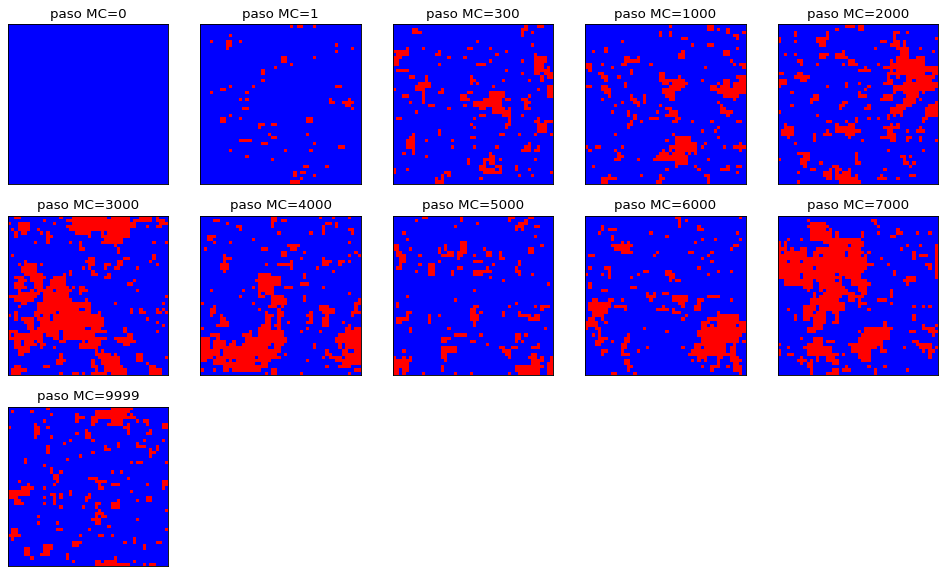

In [18]:
rm = IsingMetropolis()
rm.simulacion()
